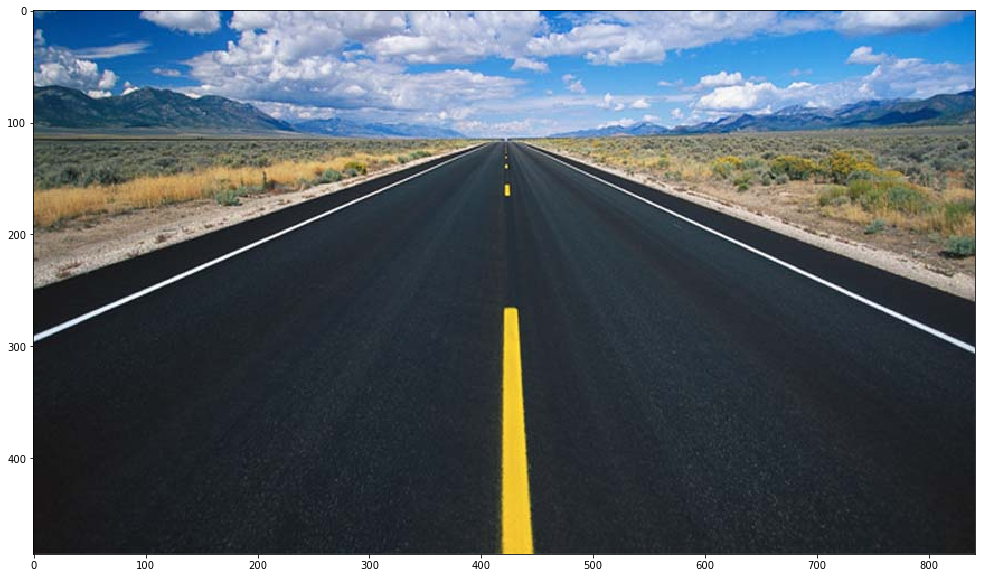

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#img = cv2.imread('Building.jpg')
img = cv2.imread('Road.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(25, 10))
plt.imshow(img[:,:,::-1]);

In [2]:
# Detect Edges
edges = cv2.Canny(gray, 50, 200)
# Get Lines
kernel_size = 5
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 25     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 20 #minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments



In [6]:
def nothing(x):
    pass


cv2.namedWindow('Hough')

cv2.createTrackbar('max_line_gap', 'Hough', 300, 500, nothing)
cv2.createTrackbar('min_line_length', 'Hough', 100, 1000, nothing)
cv2.createTrackbar('rho', 'Hough', 2, 360, nothing)

blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

edges = cv2.Canny(blur_gray, 50, 200)

while 1:
    image = img.copy()
    x = cv2.getTrackbarPos('max_line_gap','Hough')
    y= cv2.getTrackbarPos('min_line_length','Hough')
    z=cv2.getTrackbarPos('rho','Hough')
    
    lines = cv2.HoughLinesP(edges, z, theta, threshold, np.array([]),x, y)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image,(x1,y1),(x2,y2),(255,0,0),10)
    
    edgesC = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    image = cv2.addWeighted(image, 0.9, edgesC, 0.5, 0)
    cv2.imshow('Hough', image)
    k = cv2.waitKey(1)
    if k == 27:
        break

cv2.destroyAllWindows()